# Entregável 1 - visão computacional

Isabella Rocha de Oliveira e Eric Otofuji Abrantes

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print "OpenCV Version : %s " % cv2.__version__

OpenCV Version : 2.4.8 


# Equalização de histograma

In [2]:
rintin = cv2.imread("RinTinTin.jpg")

In [3]:
rintin.shape

(240, 320, 3)

In [4]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [5]:
rintin_gray.shape

(240, 320)

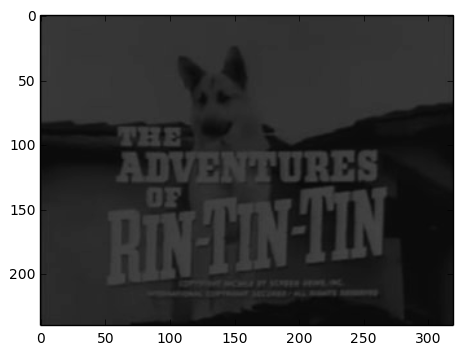

In [6]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

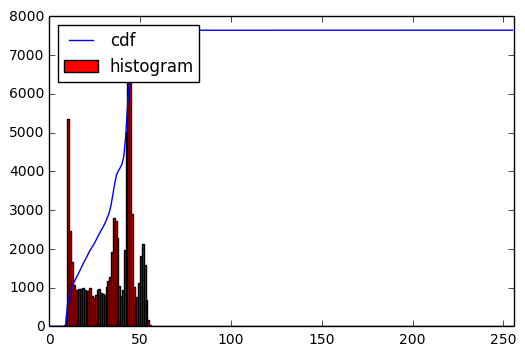

In [7]:
hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

#### 1. O histograma não aproveita bem as faixas de cores, pois ele concentra a frequência de tons apenas entre 0 e aproximadamente 60, sendo que poderia ter tons distribuidos até o valor 255. Isso faz com que a imagem não tenha uma grande variação de tons e fique escura.

Maior pixel existente na imagem depois da transformação:
255


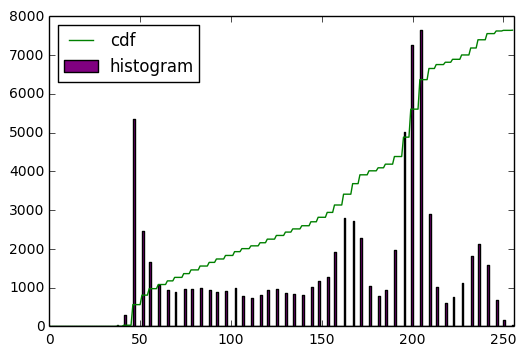

In [8]:
# 2: Histograma equalizado

img2 = rintin_gray

for i in range(len(rintin_gray)):
    for j in range(len(rintin_gray[0])):
        img2[i][j] = (img2[i][j])*4.6457489879
print "Maior pixel existente na imagem depois da transformação:" 
print np.amax(img2)



hist2,bins = np.histogram(img2.flatten(),256,[0,256])

cdf2 = hist2.cumsum()
cdf_normalized2 = cdf2 * hist2.max()/ cdf2.max()

plt.plot(cdf_normalized2, color = 'g')
plt.hist(img2.flatten(),256,[0,256], color = 'purple')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Imagem transformada pela função:


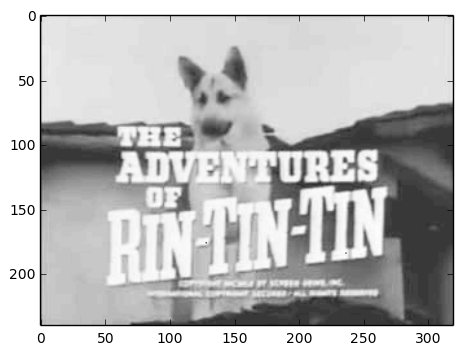

In [9]:
# 3 Imagem 
print "Imagem transformada pela função:"
plt.imshow(img2, cmap="Greys_r", vmin=0, vmax=255)

Apenas para efeito de comparação, uma imagem transformada usando a função de equalização do OpenCV. Assim, pode-se comparar a eficiência da transformação aplicada acima na atividade.


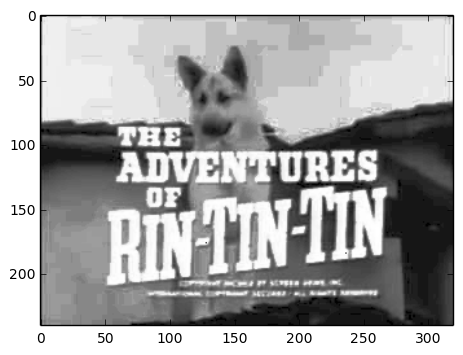

In [10]:
print "Apenas para efeito de comparação, uma imagem transformada usando a função de equalização do OpenCV. Assim, pode-se comparar a eficiência da transformação aplicada acima na atividade."
img3 = cv2.equalizeHist(rintin_gray)
plt.imshow(img3, cmap="Greys_r", vmin=0, vmax=255)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


In [11]:
foto = cv2.imread("hall_box_battery1.jpg")

In [12]:
foto_rgb = cv2.cvtColor(foto, cv2.COLOR_BGR2RGB)

In [13]:
foto_r = foto_rgb[:,:,0]
foto_b = foto_rgb[:,:,2]

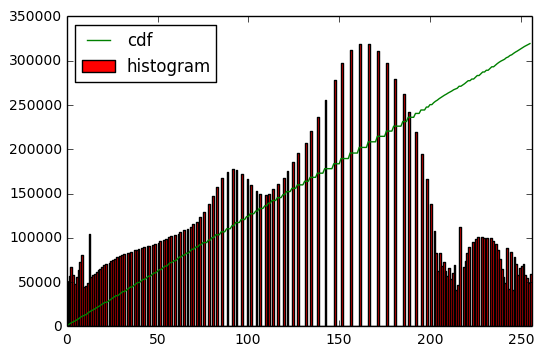

In [14]:
foto3 = cv2.equalizeHist(foto_r)

hist3,bins = np.histogram(foto3.flatten(),256,[0,256])

cdf3 = hist3.cumsum()
cdf_normalized3 = cdf3 * hist3.max()/ cdf3.max()

plt.plot(cdf_normalized3, color = 'g')
plt.hist(foto3.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

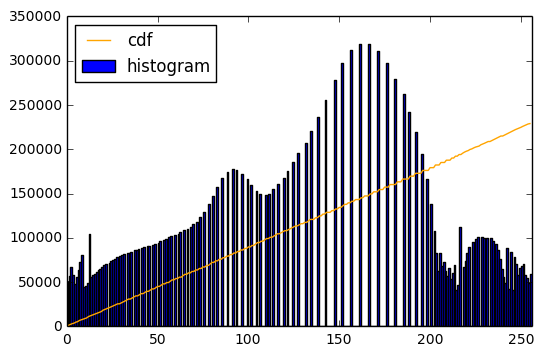

In [15]:
foto4 = cv2.equalizeHist(foto_b)

hist4,bins = np.histogram(foto4.flatten(),256,[0,256])

cdf4 = hist4.cumsum()
cdf_normalized4 = cdf4 * hist4.max()/ cdf4.max()

plt.plot(cdf_normalized4, color = 'orange')
plt.hist(foto3.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

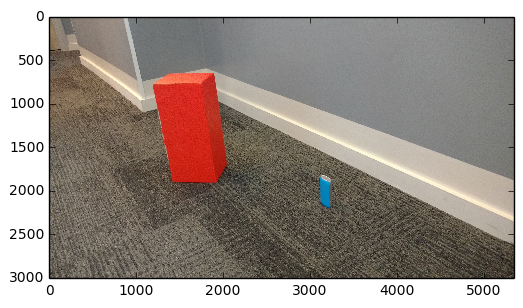

In [ ]:
plt.imshow(foto_rgb)
imagem = foto_rgb
picture = foto_rgb

In [ ]:
for i in range(len(imagem)):
    for j in range(len(imagem[i])):
        if imagem[i][j][0] >= 150:
            if imagem[i][j][1] <= 140:
                if imagem[i][j][2] <= 140:
                    imagem[i][j][0] = 255
                    imagem[i][j][1] = 255
                    imagem[i][j][2] = 255

In [ ]:
plt.imshow(foto_rgb)

In [ ]:
plt.imshow(imagem)

In [ ]:
for i in range(len(picture)):
    for j in range(len(picture[i])):
        if picture[i][j][0] <= 130:
            if picture[i][j][1] <= 130:
                if picture[i][j][2] >= 130:
                    picture[i][j][0] = 0
                    picture[i][j][1] = 0
                    picture[i][j][2] = 0

In [ ]:
plt.imshow(picture)